# Machine Learning for Remote Sensing and GIS (GEOG-784)
#### Course Instructor: Dr. Maitiniyazi Maimaitijiang, Department of Geography & Geospatial Sciences, SDSU

## Mini_project_2: Crop leaf nutrient level esimtation using hyperspectral proximal sensing

## Learning Objectives:

* Understand dimension reduction, data normalization and be able to actually implment in realworld cases.
* Understand different parameters of classical ML algorithms, be able to actually implment parameter tuning in realworld cases.

## 1. Import Lib

In [ ]:
import pandas as pd
import numpy as np
from google.colab import files
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

## 2. Load data, feature scalling and dimension reduction

### 2.1 Load data

In [ ]:
uploaded = files.upload()
img_file = '/content/data.xlsx'

df = pd.read_excel(img_file, sheet_name = 'Sheet1')

df


Saving data.xlsx to data (1).xlsx


,Plot_ID,LCC,350,351,352,353,354,355,356,357,...,2491,2492,2493,2494,2495,2496,2497,2498,2499,2500
0,M312,28.8,15.860227,9.774000,13.175862,13.428761,8.958094,13.098701,16.494692,15.920308,...,45.282684,40.607319,24.261955,14.021358,18.021902,21.902067,24.700001,27.497932,17.583925,6.255947
1,M015,30.8,9.529243,7.463000,9.941740,13.112441,17.321108,17.430378,18.501591,22.880409,...,2.503524,3.889073,6.403220,9.456512,13.767517,17.349646,14.379000,11.408355,8.270518,5.114084
2,M108,31.3,11.272360,7.143000,13.839225,15.791698,10.628365,11.283675,12.128814,11.908186,...,30.656300,33.531658,35.478973,35.828629,32.451283,28.807692,22.770500,16.733309,27.062237,39.211597
3,M134,32.1,22.599764,26.316000,28.736614,22.606449,3.649782,16.704529,26.689041,21.208958,...,3.196046,3.158223,2.808670,2.573274,2.604184,2.701835,3.399500,4.097165,4.098688,4.022777
4,M239,32.7,17.810272,23.684000,24.739620,21.312262,11.160262,11.154676,13.389713,18.222286,...,13.011713,15.151894,21.925680,29.189375,37.595924,44.133724,33.870998,23.608274,14.583553,5.696539
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
388,M383,66.6,31.363003,32.353001,25.213654,25.507263,36.950600,27.642174,19.400814,19.030186,...,28.915920,26.213753,16.141254,10.881922,16.850691,23.692532,38.383499,53.074471,51.322460,47.741470
389,M361,66.7,9.497987,6.098000,12.117977,15.296140,14.211473,17.888584,20.399136,18.952864,...,33.461838,26.506557,23.519674,20.878263,19.042767,17.198421,15.274500,13.350580,9.290789,4.993420
390,M157,67.3,8.923623,8.333000,10.789865,11.841606,10.785606,11.355556,10.979148,7.972852,...,3.510967,3.933089,7.877268,11.460288,14.200804,16.515320,15.000000,13.484680,9.394204,5.017289
391,M107,67.8,17.172911,26.471001,22.622265,19.672209,18.070210,20.243788,20.509165,15.342836,...,2.859045,6.671537,14.132611,17.202238,10.027534,3.577051,3.637500,3.697949,11.813526,20.825090


(393, 2151)
(393,)


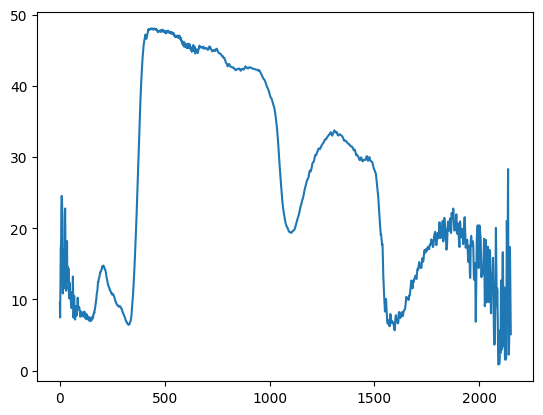

In [ ]:
# Get X and y
X = df.loc[:,350:].values #selecing values all coloumns from column 350 till the end
y = df['LCC'].values
print(X.shape)
print(y.shape)

# Plot one of the samples
plt.plot(X[1,:]) #spectral profile of one sample

In [ ]:
print(type(X))
print(X)
print(type(y))
print(y)

<class 'numpy.ndarray'>
[[15.860227  9.774    13.175862 ... 27.497932 17.583925  6.255947]
 [ 9.529243  7.463     9.94174  ... 11.408355  8.270518  5.114084]
 [11.27236   7.143    13.839225 ... 16.733309 27.062237 39.211597]
 ...
 [ 8.923623  8.333    10.789865 ... 13.48468   9.394204  5.017289]
 [17.172911 26.471001 22.622265 ...  3.697949 11.813526 20.82509 ]
 [35.964767 40.351002 41.074749 ...  5.294363  9.007355 14.38611 ]]
<class 'numpy.ndarray'>
[28.8 30.8 31.3 32.1 32.7 33.5 33.7 33.8 33.9 34.  34.1 34.3 34.3 34.5
 35.  35.3 35.7 35.9 36.1 36.3 36.8 37.2 37.2 37.3 37.8 38.1 38.2 38.2
 38.3 38.4 38.6 38.7 38.8 38.9 38.9 38.9 39.  39.3 39.6 39.6 39.8 39.8
 39.8 40.2 40.4 40.5 40.8 40.8 40.8 40.9 40.9 41.  41.  41.2 41.2 41.2
 41.3 41.3 41.7 41.8 42.  42.  42.2 42.2 42.4 42.5 42.5 42.5 42.6 42.6
 42.8 42.9 42.9 42.9 43.  43.  43.1 43.1 43.2 43.4 43.5 43.7 43.9 44.
 44.1 44.1 44.1 44.2 44.3 44.4 44.4 44.4 44.6 44.6 44.6 44.6 44.8 44.9
 45.  45.1 45.3 45.3 45.3 45.4 45.4 45.5 45.5 45

### 2.2 Feature Scaling or Data/feature normalization
Feature scaling means transforming the features in a way so that the values of each feature looses the influence of their units. For example, if we had an input dataset where there were two independent variables named area (in sq. m) and price (in USD), then we have to scale them in a way so that the model does not get weighted too much by just one variable. For this reflectance dataset, the values from all the features are actually reflectance which share similar unit (they are basically unitless since they are just percentages). So we dont have to necessarily scale the data but there could be outliers so we should consider scaling. We will do a min max scaling where every feature will have a data range from 0 to 1. We could also do Standard Scaling where the values will be converted to the z score.
Reference link: https://machinelearningmastery.com/standardscaler-and-minmaxscaler-transforms-in-python/

### *Please use the Standard Scaler for this project
* https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

#### 2.2.1 Method-1: Min Max Scaler

In [ ]:
#This will scale values from 1 to 0
#Import the module
from sklearn.preprocessing import MinMaxScaler

# Define the scaling object
scaler = MinMaxScaler()#we can also use MinMaxScaler(-1,1) :normalized value will be between -1 and 1


# Fit the scaler to X
scaler.fit(X)

#  Transform the original X to scaled/normalized X
X = scaler.transform(X)
print(X)


[[0.21594678 0.12751202 0.18789691 ... 0.3407261  0.28218684 0.04441006]
 [0.10094    0.0926716  0.12640927 ... 0.12211421 0.10698914 0.03024771]
 [0.13260495 0.08784731 0.20050887 ... 0.19446529 0.46048663 0.45315402]
 ...
 [0.08993849 0.10578764 0.14253396 ... 0.1503256  0.12812719 0.02904717]
 [0.23979261 0.37923444 0.36749342 ... 0.01735158 0.17363788 0.22510895]
 [0.58115989 0.58848804 0.71831496 ... 0.03904234 0.12085004 0.14524725]]


#### 2.2.2 Method-2: Standard Scaler
*important links: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

In [ ]:
# Import the module
from sklearn.preprocessing import StandardScaler

# Define the scaling object
scaler2 = StandardScaler()

# Fit the scaler to X
scaler2.fit(X)

# Transform the original X to scaled/normalized X
X = scaler2.transform(X)
print(X)



[[-0.3359648  -0.96460001 -0.61886287 ...  1.14135587  0.28294784
  -0.70055617]
 [-1.13054315 -1.23183141 -1.04090608 ... -0.11052227 -0.56370999
  -0.77913955]
 [-0.911771   -1.26883446 -0.53229599 ...  0.30379524  1.14459676
   1.56746247]
 ...
 [-1.20655228 -1.13122937 -0.93022832 ...  0.05102989 -0.46155859
  -0.78580102]
 [-0.17121469  0.96614987  0.61386435 ... -0.71044411 -0.24162426
   0.30209703]
 [ 2.18728157  2.57115728  3.02185811 ... -0.58623228 -0.49672604
  -0.14103568]]


### 2.3 Feature Selection (Dimension Reduction)
See that our independent feature space is quite large. There is a rule of thumb that if the sample size is less than the number of features, the model may underperform or overperform. Therefore, often we may need to reduce the dimensions (or feature space) using different techniques. Here we will use Principal Component Analysis (PCA) to reduce the dimensions.

In [ ]:
# Import the module
from sklearn.decomposition import PCA


# Define the pca object
#pca = PCA(n_components=100)

pca = PCA(n_components=20)

# Fit the pca to X
pca.fit(X)

# Transform the original X to PCs
X = pca.transform(X)  #Now X is the principle components

# Print the explained variance ratio
print(pca.explained_variance_ratio_)  #It will display the variance of each principle component



[0.57114821 0.10714195 0.10312037 0.02802589 0.00677764 0.00644173
 0.00558155 0.00542414 0.00527298 0.00522736 0.00491707 0.00487394
 0.00460638 0.00439964 0.00419154 0.00388882 0.00378569 0.00368792
 0.0034116  0.00328998]


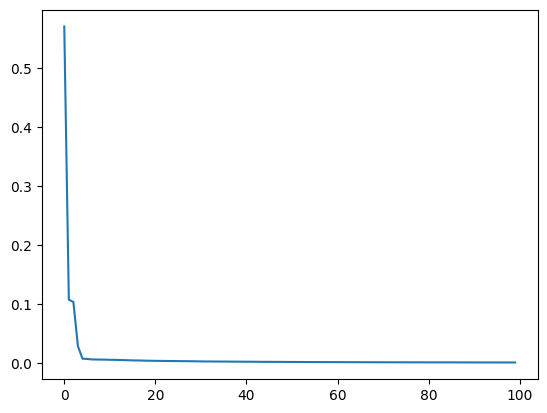

In [ ]:
# Display the explained variance ratio..Plot with 100 PCs
plt.plot(pca.explained_variance_ratio_)

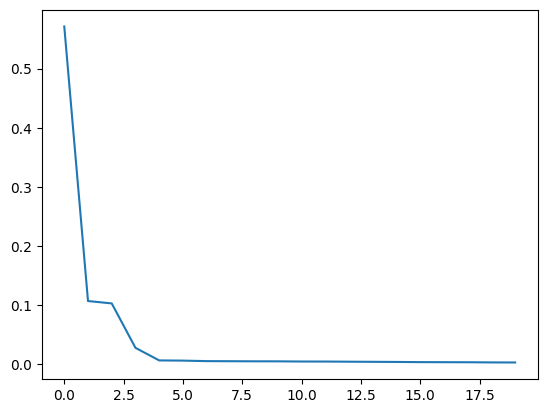

In [ ]:
#plot with 20 PCs
plt.plot(pca.explained_variance_ratio_)

## 3. ML Model Training and Testing

### 3.1 Training and testing sets split

In [ ]:
# Split the 393 data samples ramdonly into traing and testing sets (70%:30%)
from sklearn.model_selection import train_test_split

X_train,X_test, y_train, y_test = train_test_split(X,y,test_size= 0.3, random_state = 0)

print(X.shape)
print(y.shape)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)


(393, 20)
(393,)
(275, 20)
(275,)
(118, 20)
(118,)


### Before Model Buidling
* Train the following regression algorithms with hyperparameter tuning. Use the following table for the suggestion of hyperparamters and use 5 as cross validation:

| Model Name                   | Hyperparameter | Suggested values                              |
|------------------------------|----------------|-----------------------------------------------|
|1.Support Vector Machine(SVM) | kernel         | rbf, linear, poly                             |
|                              | C              | 0.125, 0.25, 0.5, 1.0, 2.0, 4.0 |
|                              | gamma          | 1, 0.1, 0.01, 0.001, 0.0001                   |
|
|
|
|2.Decision Tree (DT)           | criterion      | gini, entropy                                |
|                               | max_features   | auto, sqrt, log2, None                      |
|
|
|
|3.Random Forests (RF)         | n_estimators   | 50,100,150,200, .....,1000                    |
|                              | criterion      | gini, entropy                                 |
|                              | max_features   | auto, sqrt, log2                              |




### 3.2 Apply Support Vector Regression (SVR) to predict LCC through parameter tuning
* Important link: https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html

In [ ]:
# Import modules
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV #randomSearch can also be used here


In [ ]:
# define a model with defalt parameter settings
model_SVR = SVR()
# User define parameter ranges
kernel = ['linear', 'rbf', 'poly']
C = [0.125, 0.25, 0.5, 1.0, 2.0, 4.0]
gamma = [1,0.1, 0.01, 0.001, 0.0001]

# Define the parameter search space with different values for hyperparameters
# It has to be a dictionary, where the keys are the hyperparametr names (in string)
# and the values are the options. The values can be either list of np array.
parameters = {'kernel': kernel,
              'C': C,
              'gamma': gamma
              }



* Important link: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

In [ ]:
# Define the grid search object
grid = GridSearchCV(estimator = model_SVR,
                    param_grid = parameters,
                    cv = 5,
                    n_jobs = -1) #-1 will ensure that all the cores of processor is being used



# Fit the grid using train set
grid.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=SVR(), n_jobs=-1,
             param_grid={'C': [0.125, 0.25, 0.5, 1.0, 2.0, 4.0],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear', 'rbf', 'poly']})

In [ ]:
# Get the cross validation results
grid.cv_results_


{'mean_fit_time': array([0.00822067, 0.00789332, 0.45297356, 0.00776916, 0.00644121,
        0.01235909, 0.00770812, 0.00641789, 0.00547967, 0.00800457,
        0.006743  , 0.00764008, 0.00846653, 0.00605025, 0.0068675 ,
        0.00856776, 0.01120334, 0.49073801, 0.00947657, 0.00681295,
        0.01532812, 0.00902224, 0.00670977, 0.00617785, 0.0087544 ,
        0.00669026, 0.00581207, 0.01084518, 0.00611835, 0.00572181,
        0.01018085, 0.00727706, 0.5552999 , 0.01028914, 0.0063817 ,
        0.02052822, 0.01014462, 0.00722294, 0.00617123, 0.01058154,
        0.00604849, 0.00581164, 0.01057916, 0.00618181, 0.00594792,
        0.01965685, 0.0073761 , 0.54273362, 0.01887512, 0.00656667,
        0.03419113, 0.01738262, 0.00631967, 0.00757461, 0.01841702,
        0.00643673, 0.00532293, 0.01757908, 0.00626812, 0.0052671 ,
        0.02454576, 0.01092114, 0.54922571, 0.02512841, 0.00704389,
        0.05405102, 0.02488232, 0.00735984, 0.00600376, 0.0248508 ,
        0.00639057, 0.00533295,

In [ ]:
# Since the cross validation resutls is a dictionary and hard to read, so, convert that to a pandas datafram
import pandas as pd

cv_results = pd.DataFrame(grid.cv_results_)
cv_results


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.008221,0.001006,0.001882,0.000063,0.125,1,linear,"{'C': 0.125, 'gamma': 1, 'kernel': 'linear'}",0.506387,0.384264,0.309065,0.339640,-0.224906,0.262890,0.252978,5
1,0.007893,0.000408,0.003021,0.000331,0.125,1,rbf,"{'C': 0.125, 'gamma': 1, 'kernel': 'rbf'}",-0.014123,-0.000270,-0.024182,-0.000241,-0.000075,-0.007778,0.009817,68
2,0.452974,0.090187,0.002066,0.000247,0.125,1,poly,"{'C': 0.125, 'gamma': 1, 'kernel': 'poly'}",-9.149499,-1.201744,-1.537229,-3.031156,-377.739836,-78.531893,149.631415,90
3,0.007769,0.000320,0.001743,0.000047,0.125,0.1,linear,"{'C': 0.125, 'gamma': 0.1, 'kernel': 'linear'}",0.506387,0.384264,0.309065,0.339640,-0.224906,0.262890,0.252978,5
4,0.006441,0.000280,0.002922,0.000182,0.125,0.1,rbf,"{'C': 0.125, 'gamma': 0.1, 'kernel': 'rbf'}",0.039944,0.045542,0.016378,0.050626,0.025377,0.035573,0.012787,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,0.005892,0.000359,0.002642,0.000154,4.0,0.001,rbf,"{'C': 4.0, 'gamma': 0.001, 'kernel': 'rbf'}",0.239240,0.132609,0.150176,0.165908,0.079875,0.153562,0.051717,22
86,0.006777,0.002730,0.004703,0.003300,4.0,0.001,poly,"{'C': 4.0, 'gamma': 0.001, 'kernel': 'poly'}",-0.012643,-0.000682,-0.022809,0.000005,0.003151,-0.006596,0.009726,63
87,0.115740,0.050915,0.004397,0.003326,4.0,0.0001,linear,"{'C': 4.0, 'gamma': 0.0001, 'kernel': 'linear'}",0.279153,0.554968,0.267737,0.308604,-1.015785,0.078935,0.557405,37
88,0.013709,0.005748,0.004299,0.001624,4.0,0.0001,rbf,"{'C': 4.0, 'gamma': 0.0001, 'kernel': 'rbf'}",0.036346,0.031708,0.015824,0.038064,0.025590,0.029507,0.008092,47


In [ ]:
# print best parameter
print(grid.best_params_)


{'C': 4.0, 'gamma': 0.1, 'kernel': 'rbf'}


In [ ]:
# Get the best model
best_model_SVR = grid.best_estimator_


MSE: 94.95889830508476
RMSE: 9.744685644241416
R2: -0.4565179381994957


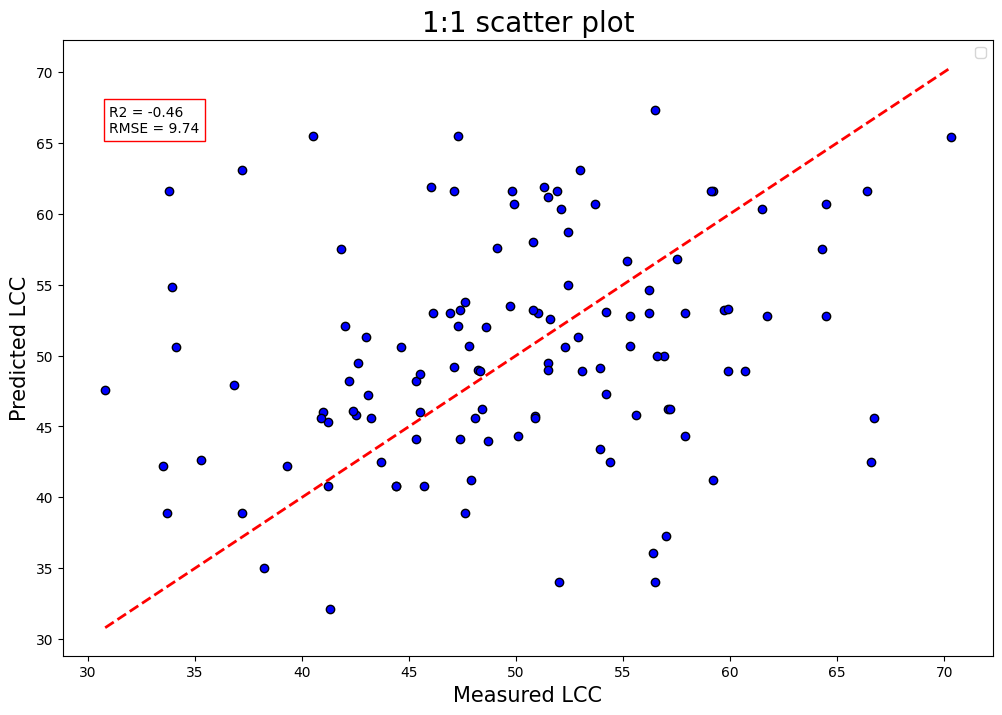

In [ ]:
# Evaluate model using testing dataset
from sklearn.metrics import mean_squared_error, r2_score
y_pred = best_model_SVR.predict(X_test)

MSE = mean_squared_error(y_test, y_pred)
RMSE = np.sqrt(MSE)
R2 = r2_score(y_test,y_pred)

print("MSE: " + str(MSE))
print("RMSE: " + str(RMSE))
print("R2: "+ str(R2))

fig,ax = plt.subplots(figsize = (12,8))
ax.scatter(y_test, y_pred, color = 'b', edgecolors = (0,0,0))
ax.plot([y_test.min(), y_test.max()],[y_test.min(), y_test.max()], 'r--', lw = 2)
text = r"R2 = %.2f" % (R2);text += "\n"; text += r"RMSE = %.2f" % (RMSE)
plt.annotate(text, xy = (0.05, 0.85),xycoords = 'axes fraction', color = 'black', fontsize = 10, bbox = dict(facecolor = 'none', edgecolor = 'red') )
ax.set_xlabel('Measured LCC', fontsize = 15)
ax.set_ylabel('Predicted LCC', fontsize = 15)
ax.set_title('1:1 scatter plot', fontsize = 20)
plt.legend()
plt.show()

In [ ]:
RRMSE = (RMSE/np.mean(y_test))*100

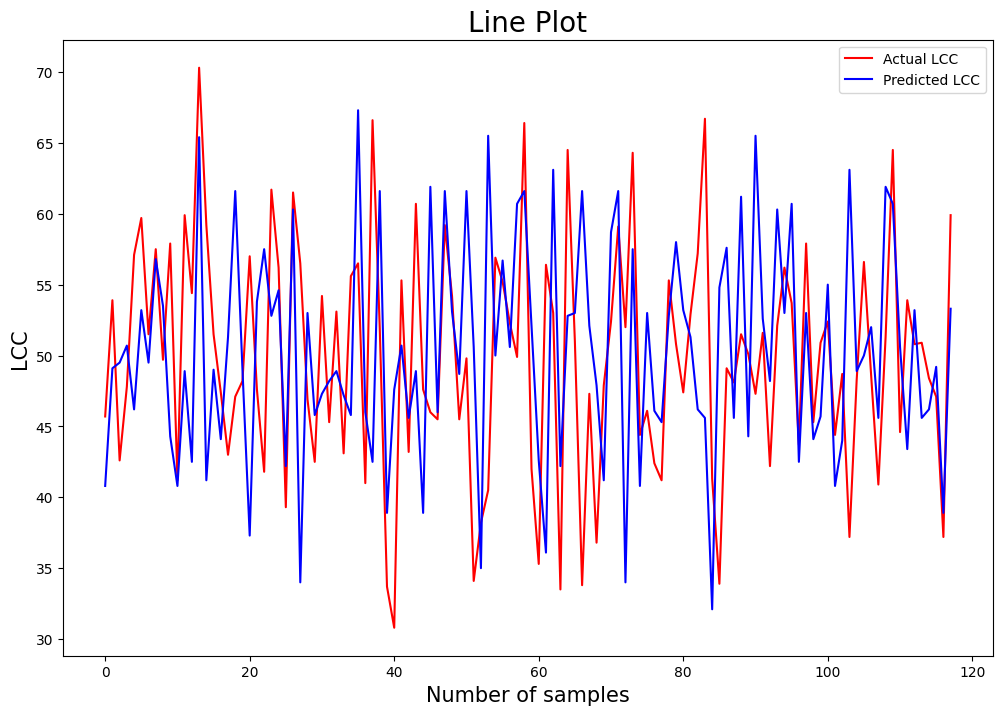

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))
plt.plot(y_test,color = 'r' , label = 'Actual LCC')
plt.plot(y_pred, color = 'b', label = 'Predicted LCC')

#text = r'R2 = %.2f' % (R2);text += "\n" ; text += r'RMSE = %.2f' % (RMSE);text += "\n"; text += r"RRMSE=%.2f"  % (RRMSE) +'%'
#plt.annotate(text, xy = (0.05,0.85), xycoords = 'axes fraction', color ='black', fontsize = 10, bbox = dict(facecolor = 'none', edgecolor = 'red'))
ax.set_xlabel('Number of samples', fontsize = 15)
ax.set_ylabel('LCC', fontsize = 15)
ax.set_title('Line Plot', fontsize = 20)
plt.legend()
plt.show()
fig.savefig('Line_plot.jpg')

### 3.3 Apply Decision Tree-based regression to predict LCC through parameter tuning
* Important link: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

model_DTR = DecisionTreeRegressor()

criterion = ['absolute_error', 'friedman_mse', 'squared_error', 'poisson']
max_features = ['sqrt', 'log2', 'None']

parameters = {'criterion': criterion,
              'max_features': max_features}

grid = GridSearchCV(estimator = model_DTR,
                   param_grid = parameters,
                   cv = 5,
                   n_jobs = -1)

grid.fit(X_train, y_train)



/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
20 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py", line 1247, in fit
    super().fit(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py", line 177, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _valida

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'criterion': ['absolute_error', 'friedman_mse',
                                       'squared_error', 'poisson'],
                         'max_features': ['sqrt', 'log2', 'None']})

In [ ]:
# Get the cross validation results
grid.cv_results_

{'mean_fit_time': array([0.00898118, 0.00926738, 0.00060768, 0.00249238, 0.00200543,
        0.00034919, 0.00325179, 0.00190458, 0.0003263 , 0.00252295,
        0.00222492, 0.00033703]),
 'std_fit_time': array([4.93007364e-04, 1.24277127e-03, 2.71095885e-04, 6.14861563e-04,
        1.26435564e-04, 4.80860426e-05, 2.61294901e-03, 4.84595601e-05,
        6.46214812e-05, 1.58303976e-04, 2.90425930e-04, 6.10743710e-05]),
 'mean_score_time': array([0.00114722, 0.00148311, 0.        , 0.0018014 , 0.00076203,
        0.        , 0.00081773, 0.00073128, 0.        , 0.00117183,
        0.000664  , 0.        ]),
 'std_score_time': array([1.47418694e-04, 5.79710460e-04, 0.00000000e+00, 1.65384413e-03,
        7.89333884e-05, 0.00000000e+00, 9.79253806e-05, 2.23887106e-05,
        0.00000000e+00, 8.09587041e-04, 8.63270184e-05, 0.00000000e+00]),
 'param_criterion': masked_array(data=['absolute_error', 'absolute_error', 'absolute_error',
                    'friedman_mse', 'friedman_mse', 'friedman

In [ ]:
# Since the cross validation resutls is a dictionary and hard to read, so, convert that to a pandas datafram
import pandas as pd

cv_results = pd.DataFrame(grid.cv_results_)
cv_results


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_features,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.008981,0.000493,0.001147,0.000147,absolute_error,sqrt,"{'criterion': 'absolute_error', 'max_features'...",-0.828789,-0.291793,-0.590172,-0.279125,-0.475395,-0.493055,0.204320,3
1,0.009267,0.001243,0.001483,0.000580,absolute_error,log2,"{'criterion': 'absolute_error', 'max_features'...",-0.940644,-0.118722,-0.900245,-0.449844,-0.704271,-0.622745,0.306153,6
2,0.000608,0.000271,0.000000,0.000000,absolute_error,None,"{'criterion': 'absolute_error', 'max_features'...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,9
3,0.002492,0.000615,0.001801,0.001654,friedman_mse,sqrt,"{'criterion': 'friedman_mse', 'max_features': ...",-0.700773,0.088040,-0.109881,-0.086357,-0.781991,-0.318192,0.353169,1
4,0.002005,0.000126,0.000762,0.000079,friedman_mse,log2,"{'criterion': 'friedman_mse', 'max_features': ...",-0.642424,-0.195222,-0.169261,-0.231117,-0.377626,-0.323130,0.175169,2
5,0.000349,0.000048,0.000000,0.000000,friedman_mse,None,"{'criterion': 'friedman_mse', 'max_features': ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,9
6,0.003252,0.002613,0.000818,0.000098,squared_error,sqrt,"{'criterion': 'squared_error', 'max_features':...",-0.914333,-0.425036,-0.259478,-0.236767,-0.736124,-0.514348,0.268015,5
7,0.001905,0.000048,0.000731,0.000022,squared_error,log2,"{'criterion': 'squared_error', 'max_features':...",-1.057784,-0.210988,-0.253140,-0.329451,-0.650048,-0.500282,0.318494,4
8,0.000326,0.000065,0.000000,0.000000,squared_error,None,"{'criterion': 'squared_error', 'max_features':...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,9
9,0.002523,0.000158,0.001172,0.000810,poisson,sqrt,"{'criterion': 'poisson', 'max_features': 'sqrt'}",-1.590324,-0.305438,-0.964445,-0.269780,-0.523865,-0.730771,0.495917,8


In [ ]:
# print best parameter
print(grid.best_params_)


{'criterion': 'friedman_mse', 'max_features': 'sqrt'}


In [ ]:
best_model_DTR = grid.best_estimator_

MSE: 94.95889830508476
RMSE: 9.744685644241416
R2: -0.4565179381994957


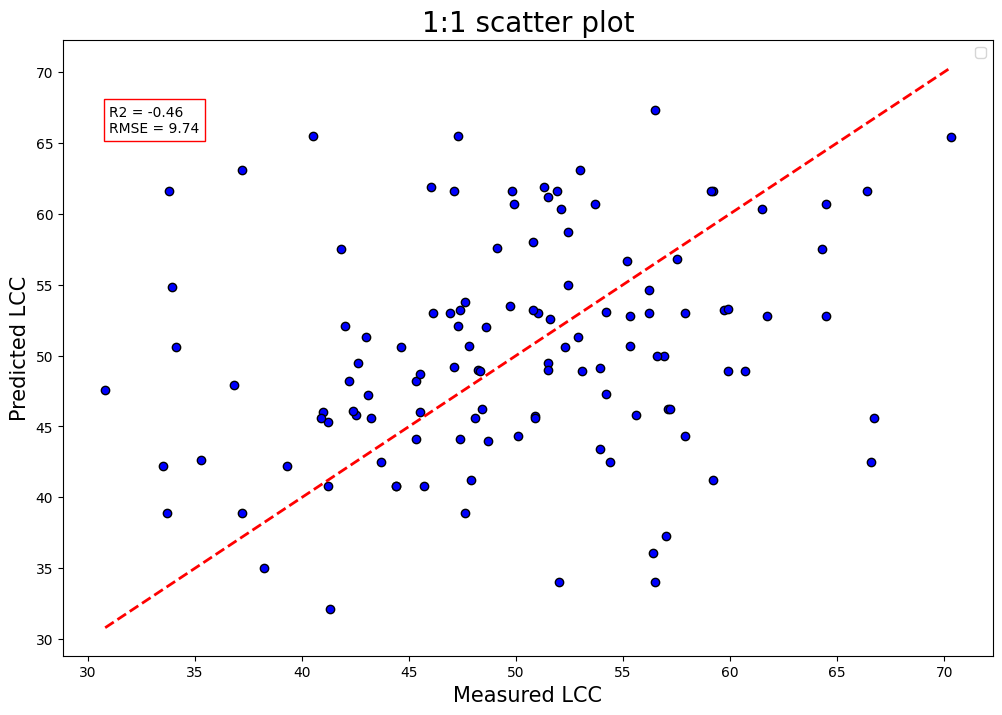

In [ ]:
# Evaluate model using testing dataset
from sklearn.metrics import mean_squared_error, r2_score
y_pred = best_model_DTR.predict(X_test)

MSE = mean_squared_error(y_test, y_pred)
RMSE = np.sqrt(MSE)
R2 = r2_score(y_test,y_pred)

print("MSE: " + str(MSE))
print("RMSE: " + str(RMSE))
print("R2: "+ str(R2))

fig,ax = plt.subplots(figsize = (12,8))
ax.scatter(y_test, y_pred, color = 'b', edgecolors = (0,0,0))
ax.plot([y_test.min(), y_test.max()],[y_test.min(), y_test.max()], 'r--', lw = 2)
text = r"R2 = %.2f" % (R2);text += "\n"; text += r"RMSE = %.2f" % (RMSE)
plt.annotate(text, xy = (0.05, 0.85),xycoords = 'axes fraction', color = 'black', fontsize = 10, bbox = dict(facecolor = 'none', edgecolor = 'red') )
ax.set_xlabel('Measured LCC', fontsize = 15)
ax.set_ylabel('Predicted LCC', fontsize = 15)
ax.set_title('1:1 scatter plot', fontsize = 20)
plt.legend()
plt.show()

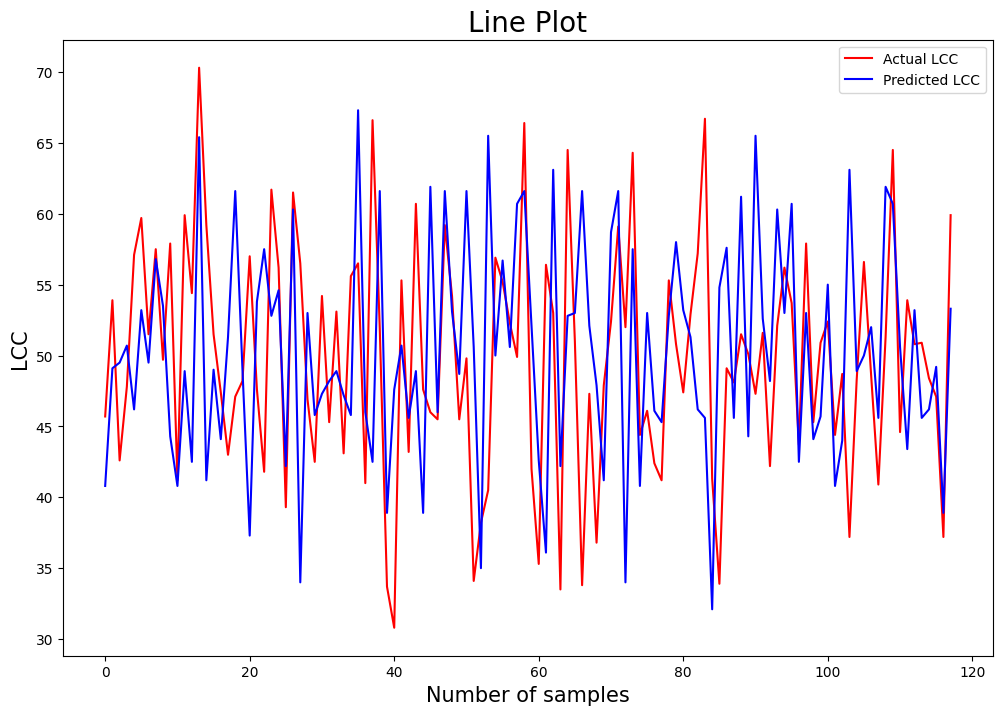

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))
plt.plot(y_test,color = 'r' , label = 'Actual LCC')
plt.plot(y_pred, color = 'b', label = 'Predicted LCC')

#text = r'R2 = %.2f' % (R2);text += "\n" ; text += r'RMSE = %.2f' % (RMSE);text += "\n"; text += r"RRMSE=%.2f"  % (RRMSE) +'%'
#plt.annotate(text, xy = (0.05,0.85), xycoords = 'axes fraction', color ='black', fontsize = 10, bbox = dict(facecolor = 'none', edgecolor = 'red'))
ax.set_xlabel('Number of samples', fontsize = 15)
ax.set_ylabel('LCC', fontsize = 15)
ax.set_title('Line Plot', fontsize = 20)
plt.legend()
plt.show()
fig.savefig('Line_plot.jpg')

### 3.4 Apply Random Forest Regression to predict LCC through parameter tuning
* Important link: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html

In [ ]:
from sklearn.ensemble import RandomForestRegressor

model_RFR = RandomForestRegressor()
n_estimators =[]
for i in range(20):
  n_estimators = n_estimators + [50+i*50]

In [ ]:
print(n_estimators)

[50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 800, 850, 900, 950, 1000]


In [ ]:


criterion = ['squared_error', 'friedman_mse', 'poisson', 'absolute_error']
max_features = ['sqrt', 'log2']

parameters = {'n_estimators': n_estimators,
              'criterion': criterion,
              'max_features': max_features}



grid = GridSearchCV(estimator = model_RFR,
                   param_grid = parameters,
                   cv = 5,
                   n_jobs = -1)

grid.fit(X_train, y_train)





GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'poisson', 'absolute_error'],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [50, 100, 150, 200, 250, 300, 350, 400,
                                          450, 500, 550, 600, 650, 700, 750,
                                          800, 850, 900, 950, 1000]})

In [ ]:
#MinMaxScaler
grid.cv_results_

{'mean_fit_time': array([0.16067796, 0.30412216, 0.42497921, 0.56926136, 0.76018872,
        1.38653646, 1.01454444, 1.12994375, 1.2750535 , 3.07322192,
        3.0121357 , 2.62798915, 1.81705127, 2.6254077 , 2.16117058,
        2.89514413, 2.43740244, 3.77460632, 4.35368118, 2.78397465,
        0.14239864, 0.28803835, 0.42696981, 1.01541014, 0.84240074,
        0.83952579, 0.98670983, 1.30246153, 3.11436386, 2.41450481,
        2.80037336, 1.67974133, 2.43753476, 2.23932281, 3.73806853,
        2.20598502, 3.10227146, 5.16270318, 3.61096859, 3.30203123,
        0.13926516, 0.28123279, 0.4331121 , 0.57435217, 1.02176361,
        1.13541126, 0.99249496, 1.13320961, 1.27388582, 2.04295034,
        1.5399682 , 1.71784773, 2.44161358, 1.98766074, 2.7468143 ,
        2.27342286, 3.08877678, 2.53207116, 3.30145197, 2.83809643,
        0.14440274, 0.3888308 , 0.72523751, 0.78781257, 0.72025294,
        0.86554952, 0.99584851, 1.22065468, 1.86740766, 1.43382783,
        1.56622295, 2.35124488,

In [ ]:
#MinMaxScaler
# Since the cross validation resutls is a dictionary and hard to read, so, convert that to a pandas datafram
import pandas as pd

cv_results = pd.DataFrame(grid.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_features,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.160678,0.014861,0.004851,0.000662,squared_error,sqrt,50,"{'criterion': 'squared_error', 'max_features':...",0.442780,0.354568,0.216249,0.281752,0.243825,0.307835,0.081926,126
1,0.304122,0.022045,0.009934,0.003770,squared_error,sqrt,100,"{'criterion': 'squared_error', 'max_features':...",0.378307,0.359764,0.227293,0.319673,0.217397,0.300487,0.066632,151
2,0.424979,0.011859,0.011762,0.000545,squared_error,sqrt,150,"{'criterion': 'squared_error', 'max_features':...",0.415840,0.402596,0.229603,0.319839,0.226390,0.318854,0.081161,83
3,0.569261,0.016534,0.014451,0.000513,squared_error,sqrt,200,"{'criterion': 'squared_error', 'max_features':...",0.371739,0.416448,0.236023,0.333056,0.244204,0.320294,0.070635,74
4,0.760189,0.070666,0.019093,0.003372,squared_error,sqrt,250,"{'criterion': 'squared_error', 'max_features':...",0.385866,0.401391,0.230738,0.344672,0.232642,0.319062,0.073711,79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,5.765318,0.591654,0.062919,0.019434,absolute_error,log2,800,"{'criterion': 'absolute_error', 'max_features'...",0.404105,0.388387,0.217347,0.310055,0.226721,0.309323,0.078125,122
156,6.268299,0.560322,0.059406,0.006751,absolute_error,log2,850,"{'criterion': 'absolute_error', 'max_features'...",0.391148,0.387632,0.207422,0.304873,0.242986,0.306812,0.074297,132
157,6.764067,0.596736,0.069110,0.024446,absolute_error,log2,900,"{'criterion': 'absolute_error', 'max_features'...",0.382296,0.388827,0.211039,0.291848,0.236932,0.302188,0.072934,146
158,6.959046,0.537766,0.075882,0.023790,absolute_error,log2,950,"{'criterion': 'absolute_error', 'max_features'...",0.391386,0.387368,0.212011,0.296156,0.225457,0.302475,0.076508,143


In [ ]:
#Standard Scaler
# Since the cross validation resutls is a dictionary and hard to read, so, convert that to a pandas datafram
import pandas as pd

cv_results = pd.DataFrame(grid.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_features,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.140375,0.003909,0.004226,0.000184,squared_error,sqrt,50,"{'criterion': 'squared_error', 'max_features':...",0.420656,0.336656,0.293790,0.360011,0.261419,0.334506,0.054912,153
1,0.275844,0.004975,0.007268,0.000075,squared_error,sqrt,100,"{'criterion': 'squared_error', 'max_features':...",0.430239,0.368216,0.296510,0.364035,0.289827,0.349766,0.051863,120
2,0.409092,0.005773,0.010232,0.000077,squared_error,sqrt,150,"{'criterion': 'squared_error', 'max_features':...",0.439006,0.391118,0.290559,0.390471,0.303988,0.363028,0.056661,5
3,0.536940,0.006587,0.013126,0.000096,squared_error,sqrt,200,"{'criterion': 'squared_error', 'max_features':...",0.401532,0.356968,0.269122,0.360585,0.307180,0.339077,0.046031,151
4,0.678835,0.007270,0.016171,0.000172,squared_error,sqrt,250,"{'criterion': 'squared_error', 'max_features':...",0.407244,0.392648,0.305098,0.376343,0.330400,0.362347,0.038543,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,5.657445,0.583929,0.057441,0.017553,absolute_error,log2,800,"{'criterion': 'absolute_error', 'max_features'...",0.413063,0.352844,0.303670,0.360985,0.317420,0.349596,0.038243,122
156,6.089375,0.637366,0.052202,0.001225,absolute_error,log2,850,"{'criterion': 'absolute_error', 'max_features'...",0.410755,0.360771,0.300807,0.363852,0.335437,0.354324,0.036160,69
157,6.284992,0.721654,0.053678,0.000378,absolute_error,log2,900,"{'criterion': 'absolute_error', 'max_features'...",0.419013,0.376209,0.291199,0.370499,0.314799,0.354344,0.045765,68
158,6.572525,0.692066,0.057221,0.000753,absolute_error,log2,950,"{'criterion': 'absolute_error', 'max_features'...",0.420889,0.343254,0.307920,0.359413,0.323703,0.351036,0.039029,108


In [ ]:
#MinMaxScaler
# print best parameter
print(grid.best_params_)

{'criterion': 'squared_error', 'max_features': 'log2', 'n_estimators': 450}


In [ ]:
#Standar Scaler
# print best parameter
print(grid.best_params_)

{'criterion': 'squared_error', 'max_features': 'sqrt', 'n_estimators': 600}


In [ ]:
# Get the best model
best_model_RFR = grid.best_estimator_

MSE: 45.29165570277398
RMSE: 6.729907555291824
R2: 0.30529829053088975


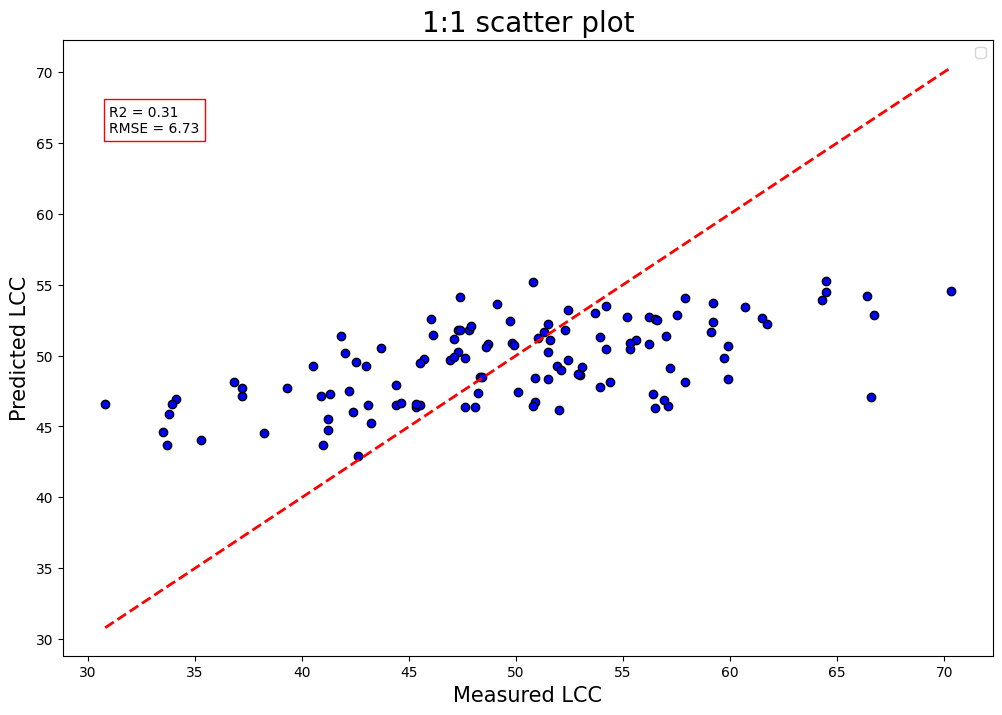

In [ ]:
# Evaluate model using testing dataset
from sklearn.metrics import mean_squared_error, r2_score
y_pred = best_model_RFR.predict(X_test)

MSE = mean_squared_error(y_test, y_pred)
RMSE = np.sqrt(MSE)
R2 = r2_score(y_test,y_pred)

print("MSE: " + str(MSE))
print("RMSE: " + str(RMSE))
print("R2: "+ str(R2))

fig,ax = plt.subplots(figsize = (12,8))
ax.scatter(y_test, y_pred, color = 'b', edgecolors = (0,0,0))
ax.plot([y_test.min(), y_test.max()],[y_test.min(), y_test.max()], 'r--', lw = 2)
text = r"R2 = %.2f" % (R2);text += "\n"; text += r"RMSE = %.2f" % (RMSE)
plt.annotate(text, xy = (0.05, 0.85),xycoords = 'axes fraction', color = 'black', fontsize = 10, bbox = dict(facecolor = 'none', edgecolor = 'red') )
ax.set_xlabel('Measured LCC', fontsize = 15)
ax.set_ylabel('Predicted LCC', fontsize = 15)
ax.set_title('1:1 scatter plot', fontsize = 20)
plt.legend()
plt.show()

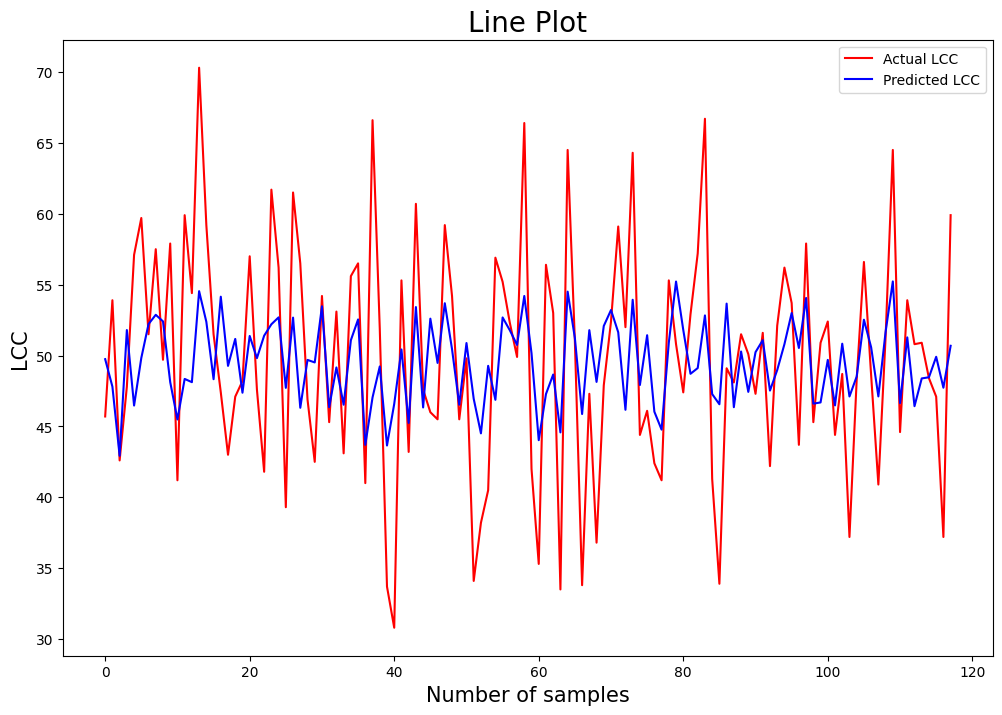

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))
plt.plot(y_test,color = 'r' , label = 'Actual LCC')
plt.plot(y_pred, color = 'b', label = 'Predicted LCC')

#text = r'R2 = %.2f' % (R2);text += "\n" ; text += r'RMSE = %.2f' % (RMSE);text += "\n"; text += r"RRMSE=%.2f"  % (RRMSE) +'%'
#plt.annotate(text, xy = (0.05,0.85), xycoords = 'axes fraction', color ='black', fontsize = 10, bbox = dict(facecolor = 'none', edgecolor = 'red'))
ax.set_xlabel('Number of samples', fontsize = 15)
ax.set_ylabel('LCC', fontsize = 15)
ax.set_title('Line Plot', fontsize = 20)
plt.legend()
plt.show()
fig.savefig('Line_plot.jpg')

### Q1: Compare the performance of Standdard scaler and Maxmin scaler in this case of random forest regression method, and list the testing R-squred, RMSE, RMSE% (RRMSE) of two cases below

In [ ]:
#1. Maxmin scaler:
RRMSE = (RMSE/np.mean(y_test))*100
RRMSE

13.507759254409695

In [ ]:
#2. Stand scaler:
RRMSE = (RMSE/np.mean(y_test))*100
RRMSE

12.628172794287904

In [ ]:
#1. Maxmin scaler:
R-squred: 0.3043192213542683
RMSE: 6.73464824114772
RRMSE: 13.507759254409695

#2. Stand scaler:
R-squred: 0.39197083354061346
RMSE: 6.296107303674117
RRMSE: 12.628172794287904


**Comparison Between Maxmin Scaler and Stand Scaler:**<br>
In case of Maxmin scaler the value of r-squared is lower than the value of r-squared in case of standard scaler. Also RMSE and RRMSE for standard scaler is slightly lower than Maxmin scaler. This shows that stand scaler is better scaler for this problem.

### Q2: Compare the performance of using pcs = 5, pcs=10, pcs=20, pcs=50, pcs=100 in this case of random forest regression method, and plot the testing R-squred, RMSE, RMSE% (RRMSE) of these five cases, respectively, below (optional: extra 2 points)

In [ ]:
# We are expceting three plots here.

In [ ]:
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
import pandas as pd

MSE = []
RMSE = []
R2 = []
RRMSE = []
pcs = [5,10,20,50,100]
for pcsi in pcs:
  X = df.loc[:,350:].values #selecing values all coloumns from column 350 till the end
  y = df['LCC'].values


  # Define the scaling object
  scaler2 = StandardScaler()

  # Fit the scaler to X
  scaler2.fit(X)

  # Transform the original X to scaled/normalized X
  X = scaler2.transform(X)
  pca = PCA(n_components=pcsi)
  # Fit the pca to X
  pca.fit(X)

  # Transform the original X to PCs
  X = pca.transform(X)  #Now X is the principle components
  X_train,X_test, y_train, y_test = train_test_split(X,y,test_size= 0.3, random_state = 0)
  model_RFR = RandomForestRegressor()
  n_estimators =[]
  for i in range(20):
    n_estimators = n_estimators + [50+i*50]
  criterion = ['squared_error', 'friedman_mse', 'poisson', 'absolute_error']
  max_features = ['sqrt', 'log2']

  parameters = {'n_estimators': n_estimators,
                'criterion': criterion,
                'max_features': max_features}



  grid = GridSearchCV(estimator = model_RFR,
                     param_grid = parameters,
                     cv = 5,
                     n_jobs = -1)

  grid.fit(X_train, y_train)

  best_model_RFR = grid.best_estimator_
  y_pred = best_model_RFR.predict(X_test)

  MSEi = mean_squared_error(y_test, y_pred)
  MSE = MSE + [MSEi]
  RMSE = RMSE + [np.sqrt(MSEi)]
  R2 = R2 + [r2_score(y_test,y_pred)]






In [ ]:
RRMSE = (RMSE/np.mean(y_test))*100

In [ ]:
print(RMSE)
print(R2)
print(RRMSE)

[5.940884299011159, 5.760304082663151, 6.296542336612093, 6.6874121276318785, 6.9023395314129]
[0.4586447422035541, 0.4910548376923233, 0.39188680642982066, 0.31404386096813475, 0.26924329676261327]
[11.91569804 11.55350628 12.62904534 13.41301725 13.84409955]


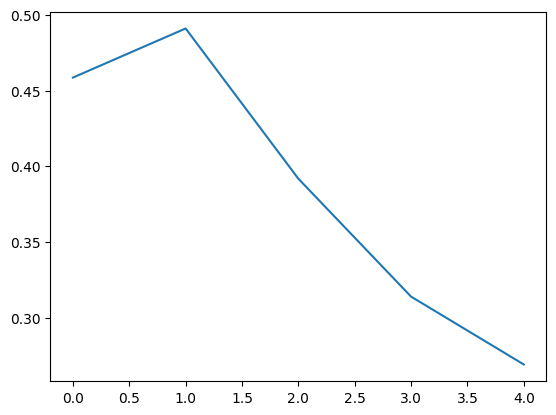

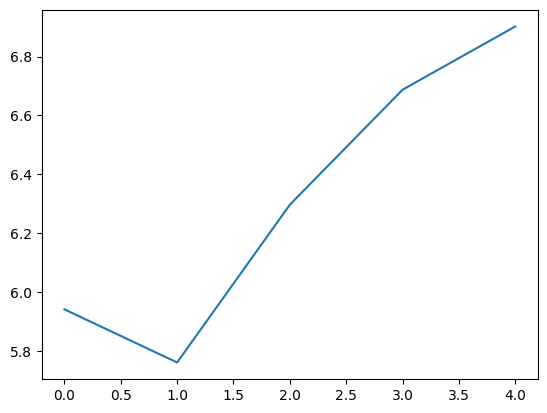

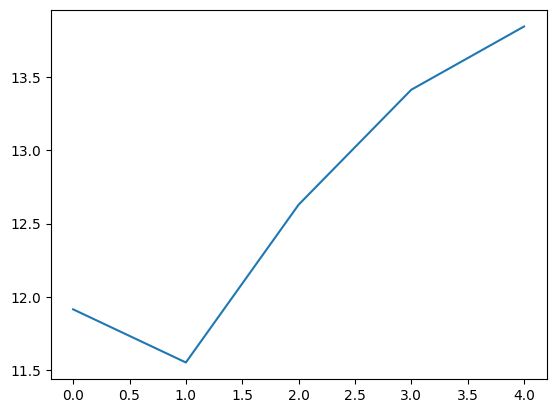

In [ ]:
import matplotlib.pyplot as plt
plt.plot(R2)
plt.figure()
plt.plot(RMSE)
plt.figure()
plt.plot(RRMSE)

In [ ]:
# Describe and compare the R-squred values in the case of using pcs=5, pcs=10, pcs=20, pcs=50, pcs=100;
# explain the possbile reasons lead to this results (R-squred values differences)
print(R2)





[0.4586447422035541, 0.4910548376923233, 0.39188680642982066, 0.31404386096813475, 0.26924329676261327]


**Comparison for using different pcs based on R2**<br>
For pcs = 5 , R^2 = 0.45, whereas for pcs= 0.49. This make sense as more pcs means we are using more information from the training data to train and so higher the determination of coefficient.<br>
But when we increase the value of pcs, the value of R^2 decreases, which shows that the predicted values are not determining the original data. I think this is happening due to overfitting. When we are increasing principle components up to 20, it might be overfitting the data in the training, so the determination of coefficient value is going down.